### 📘 PCA Classification Notebook

This notebook demonstrates **Principal Component Analysis (PCA)** for dimensionality reduction  
and compares the performance of different **classification models**:

- **Logistic Regression**
- **Support Vector Machine (Linear Kernel)**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **Gaussian Naive Bayes**

### Workflow:
1. Load and preprocess the dataset (split into train/test, feature scaling).
2. Apply **PCA** with different numbers of components (e.g., 2, 3, 5).
3. Train multiple classification models on the PCA-transformed dataset.
4. Evaluate model performance using **Accuracy** and **Confusion Matrix**.
5. Summarize results in a comparison table (Models × PCA components).

### Key Insight:
- **PCA** reduces dimensionality while retaining most of the dataset’s variance.  
- Models like **Random Forest** and **SVM** often perform strongly even with reduced dimensions.  
- The comparison table helps identify the **best-performing model** for each PCA setting.  

In [79]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

### 📂 Step 1: Load and Preprocess Dataset
- Reads **Wine.csv** into a pandas DataFrame.  
- Splits features (`X`) and target labels (`y`).  
- Divides data into **80% train / 20% test** with stratified sampling.  
- Applies **StandardScaler** for feature normalization.  
- Returns `X_train`, `X_test`, `y_train`, `y_test` for model training.

In [80]:
# Step 1: Load and preprocess dataset
def load_data(path="Wine.csv"):
    dataset = pd.read_csv(path)
    X = dataset.iloc[:, 0:13].values
    y = dataset.iloc[:, 13].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0, stratify=y
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    return X_train, X_test, y_train, y_test

### 🔬 Step 2: Apply PCA
- Initializes **PCA** with the chosen number of components (`n_components`).  
- Fits PCA on the training data (`X_train`).  
- Transforms both training and test sets into lower dimensions.  
- Reduces dataset complexity while keeping key variance.  
- Returns `X_train_pca` and `X_test_pca` for further modeling.  

In [81]:
# Step 2: Apply PCA
def apply_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

### 🤖 Step 3: Train and Evaluate Model
- Trains the given **model** using the training data (`X_train`, `y_train`).  
- Predicts outcomes on the test set (`X_test`).  
- Calculates **Accuracy** and builds a **Confusion Matrix**.  
- Prints model name, accuracy, and confusion matrix results.  
- Returns the accuracy score for comparison across models.  

In [82]:
def train_and_eval(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} | Accuracy: {round(acc, 4)}")
    print("Confusion Matrix:\n", cm)

    # return BOTH the trained model and accuracy
    return model, acc

### 🔗 Step 4: Main Pipeline
- Loads and preprocesses the dataset using `load_data()`.  
- Defines multiple **classification models** to test.  
- Runs **PCA with different component values** from `pca_list`.  
- Trains and evaluates each model, collecting their accuracies.  
- Prints a **final comparison table** (Models × PCA components).  

In [83]:
# Step 4: Plot decision boundaries (only for 2 PCA components)
def plot_results(model, X_set, y_set, title):
    if X_set.shape[1] != 2:
        print("⚠️ Plotting skipped (works only when PCA = 2).")
        return
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(
        X1, X2,
        model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75, cmap=ListedColormap(("red", "green", "blue"))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1],
            c=ListedColormap(("red", "green", "blue"))(i), label=j
        )
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()


In [84]:
# Step 5: Main pipeline
def run_pipeline(pca_list=[2, 3, 5]):
    X_train, X_test, y_train, y_test = load_data()
    models = [
        ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=0)),
        ("SVM (Linear)", SVC(kernel="linear", random_state=0)),
        ("KNN", KNeighborsClassifier(n_neighbors=5)),
        ("Decision Tree", DecisionTreeClassifier(random_state=0)),
        ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=0)),
        ("Gaussian NB", GaussianNB()),
    ]
    results = []
    for n in pca_list:
        print(f"\n==== PCA Components = {n} ====")
        X_train_pca, X_test_pca = apply_pca(X_train, X_test, n)
        for name, clf in models:
            model, acc = train_and_eval(name, clf, X_train_pca, y_train, X_test_pca, y_test)
            results.append([n, name, acc])

            # Visualize only if PCA=2
            if n == 2:
                plot_results(model, X_train_pca, y_train, f"{name} (Training set, PCA=2)")
                plot_results(model, X_test_pca, y_test, f"{name} (Test set, PCA=2)")
    # Final results table
    df = pd.DataFrame(results, columns=["PCA", "Model", "Accuracy"])
    print("\n===== FINAL RESULTS TABLE =====")
    print(df.pivot(index="Model", columns="PCA", values="Accuracy"))
    return df

### ▶️ Run Program
- Calls the `run_pipeline()` function to start execution.  
- Automatically loads data, applies PCA, trains models, and evaluates them.  
- Runs through all PCA values defined in `pca_list`.  
- Prints accuracies and confusion matrices for each model.  
- Displays a final results table comparing models across PCA settings.  


==== PCA Components = 2 ====

Logistic Regression | Accuracy: 0.9444
Confusion Matrix:
 [[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]


C:\Users\mukil\AppData\Local\Temp\ipykernel_2388\3440801637.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


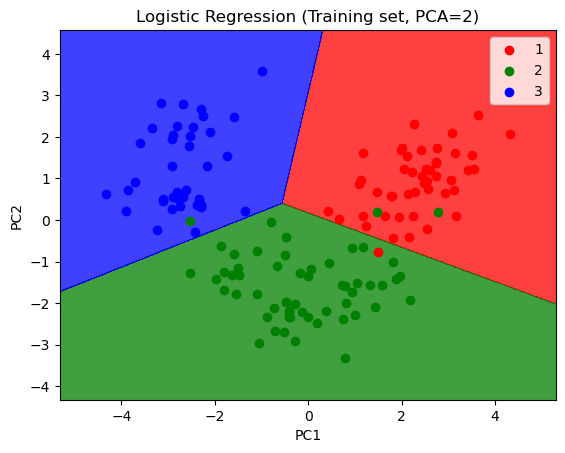

C:\Users\mukil\AppData\Local\Temp\ipykernel_2388\3440801637.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


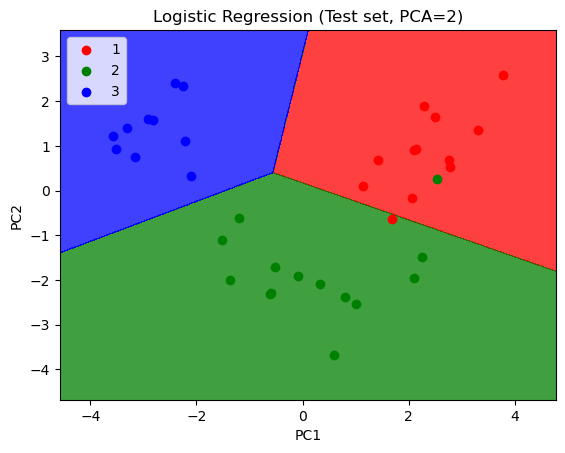


SVM (Linear) | Accuracy: 0.9444
Confusion Matrix:
 [[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]


C:\Users\mukil\AppData\Local\Temp\ipykernel_2388\3440801637.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


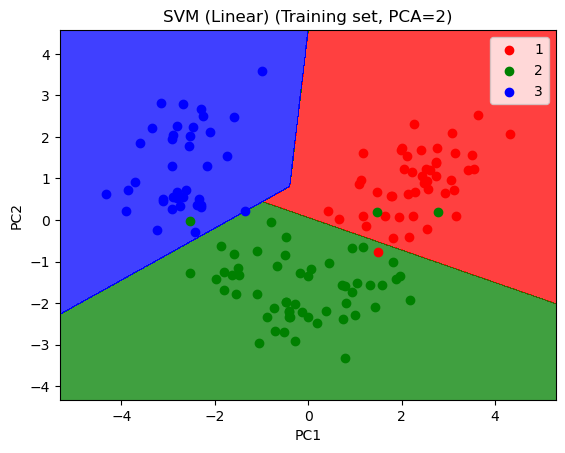

C:\Users\mukil\AppData\Local\Temp\ipykernel_2388\3440801637.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


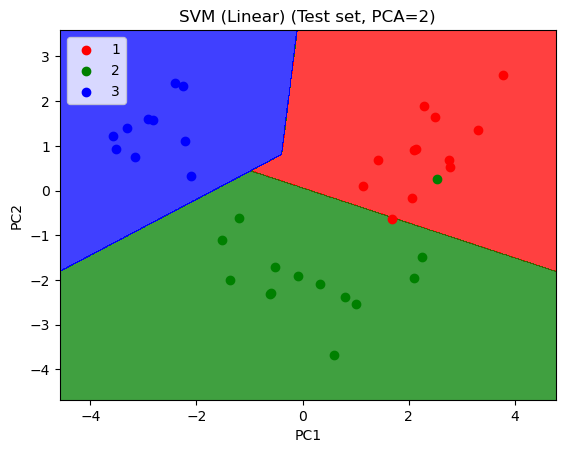


KNN | Accuracy: 0.9722
Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


In [ ]:
# Run program
run_pipeline(pca_list=[2, 3, 5])

# 🏆 Best Model & PCA Setting

From the results table:

- ✅ **Best PCA Setting**: **5 components**  
- ✅ **Best Accuracy**: **100% (1.0)**  
- ✅ **Best Models**:
  - Logistic Regression  
  - K-Nearest Neighbors (KNN)  
  - Decision Tree  
  - Gaussian Naive Bayes  

### 📌 Insight
With **PCA = 5**, multiple models achieved perfect classification accuracy.  
For smaller PCA values (2 or 3), the best accuracy reached ~0.9722 with KNN, Decision Tree, and Random Forest.  
Overall, **PCA with 5 components** gave the strongest results.  